In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('regression_data.csv')
print(dataset[:5])
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,[-1]].values

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
#OneHot encoding
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))'''

"from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')\nx = np.array(ct.fit_transform(x))"

In [4]:
#Feature Scaling (Standarization)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [5]:
#building regressor object
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5)
regressor.fit(x, y)

<ipython-input-5-dbdbc395a0a2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x, y)


RandomForestRegressor(n_estimators=5)

In [6]:
#getting predictions of test set with regressor object
y_pred=regressor.predict(x)

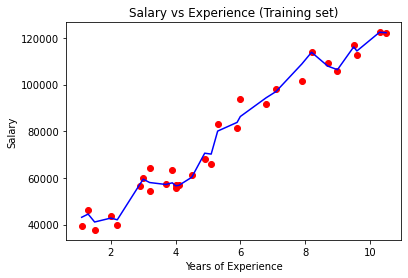

In [7]:
# Visualising the Training set results
import matplotlib.pyplot as plt
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()